## SIT220: Working with Pandas Data Frames (Heterogeneous Data)
**Author:** George David Nicholson  
**Student ID:** 218403172  
**Course:** SIT220 (Data Science Undergraduate Program)  


### Importing Libraries
In this section, we import essential libraries such as Numpy, Pandas, Matplotlib, Scipy, and Seaborn for data manipulation, statistical analysis, and visualization.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
import seaborn as sns

### _**Task:**_ Convert all columns so that they use metric (International System of Units, SI) or derived units: temp and dewp to Celsius, precip to millimetres, visib to kilometres, wind_speed and wind_gust to km/h pressure to hPa. Replace the data in-place (overwrite existing columns with new ones).


### Data Conversion to Metric Units
This section involves converting various measurements in the weather dataset to metric units (International System of Units, SI) for consistency and ease of analysis.


In [9]:
# import the csv as a frame via pd.read_csv

weatherdf = pd.read_csv("weather.csv", comment="#")

In [10]:
#function to convert farenheit to celcius
def FahrenhitToCelsius(x):
    x = (x - 32) * 5/9
    return float(x)

weatherdf['temp'] = weatherdf['temp'].apply(FahrenhitToCelsius) #fehrenhit to celsius

In [11]:
weatherdf['precip'] = weatherdf['precip'].apply(lambda x: x * 25.4) #inches to milimetres

weatherdf['visib'] = weatherdf['visib'].apply(lambda x: x * 1.609) #miles to km

weatherdf['wind_speed'] = weatherdf['wind_speed'].apply(lambda x: x / 10.197) #kilogram-force/meter² to hectopascal

weatherdf['wind_gust'] = weatherdf['wind_gust'].apply(lambda x: x / 10.197) #kilogram-force/meter² to hectopascal


### _**Task:**_ Convert the time_hour column (in-place) to the datetime64 type.


### Converting Time Data to Datetime Format
Here, we convert the 'time_hour' column to the datetime64 type, enhancing the usability of this temporal data for further analysis.


In [12]:
weatherdf #check the data frame

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,1.015693,1.168839,0.0,1013.9,16.09,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,1.354257,1.558452,0.0,1013.0,16.09,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,21.92,52.09,230.0,1.241402,1.428581,0.0,1012.6,16.09,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,23.00,54.51,230.0,1.354257,1.558452,0.0,1012.7,16.09,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,24.08,57.04,240.0,1.467112,1.688323,0.0,1012.8,16.09,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,2.2,19.94,51.78,340.0,1.354257,1.558452,0.0,1017.1,16.09,2013-12-30 20:00:00
26126,LGA,2013,12,30,20,1.1,17.06,49.51,330.0,1.692821,1.948065,0.0,1018.8,16.09,2013-12-30 21:00:00
26127,LGA,2013,12,30,21,0.0,15.08,49.19,340.0,1.467112,1.688323,0.0,1019.5,16.09,2013-12-30 22:00:00
26128,LGA,2013,12,30,22,-0.6,12.92,46.74,320.0,1.692821,1.948065,0.0,1019.9,16.09,2013-12-30 23:00:00


In [13]:
weatherdf.dtypes

origin         object
year            int64
month           int64
day             int64
hour            int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
time_hour      object
dtype: object

In [14]:
weatherdf['time_hour'] = pd.to_datetime(weatherdf['time_hour']) 
#convert the timehour label column to datetime64 using pandas on the datafram pandas -> numpy

In [15]:
weatherdf.dtypes
#successful conversion of time hour from object to datetime64

origin                object
year                   int64
month                  int64
day                    int64
hour                   int64
temp                 float64
dewp                 float64
humid                float64
wind_dir             float64
wind_speed           float64
wind_gust            float64
precip               float64
pressure             float64
visib                float64
time_hour     datetime64[ns]
dtype: object

### _**Task:**_ Compute daily mean temperatures for the JFK airport with missing hourly temperature measurements ignored (removed) whatsoever (e.g., mean of [10, NaN, 20] is simply 15).


### Computing Daily Mean Temperatures
We calculate the daily mean temperatures for JFK airport, focusing on how to handle missing hourly temperature measurements.


In [16]:
originsdf = weatherdf.groupby('origin')
originsdf.head()
# make a dataframe off of the original based around origin... duplicate really

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,1.015693,1.168839,0.0,1013.9,16.09,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,1.354257,1.558452,0.0,1013.0,16.09,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,21.92,52.09,230.0,1.241402,1.428581,0.0,1012.6,16.09,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,23.00,54.51,230.0,1.354257,1.558452,0.0,1012.7,16.09,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,24.08,57.04,240.0,1.467112,1.688323,0.0,1012.8,16.09,2013-01-01 05:00:00
8708,JFK,2013,1,1,0,3.3,23.00,54.51,240.0,1.579967,1.818194,0.0,1014.4,16.09,2013-01-01 01:00:00
8709,JFK,2013,1,1,1,3.3,24.08,57.04,250.0,1.692821,1.948065,0.0,1013.5,16.09,2013-01-01 02:00:00
8710,JFK,2013,1,1,2,3.9,24.98,56.77,240.0,1.918531,2.207807,0.0,1013.0,16.09,2013-01-01 03:00:00
8711,JFK,2013,1,1,3,3.9,26.06,59.37,240.0,1.805676,2.077936,0.0,1013.2,16.09,2013-01-01 04:00:00
8712,JFK,2013,1,1,4,3.9,24.98,56.77,260.0,1.467112,1.688323,0.0,1013.2,16.09,2013-01-01 05:00:00


In [17]:
JFKdf = originsdf.get_group('JFK').reset_index() #get data solet for JFK and reset index
JFKdf.head(10) # print first 10 rows of the datafram comprising all coloumns

,index,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,8708,JFK,2013,1,1,0,3.3,23.00,54.51,240.0,1.579967,1.818194,0.0,1014.4,16.09,2013-01-01 01:00:00
1,8709,JFK,2013,1,1,1,3.3,24.08,57.04,250.0,1.692821,1.948065,0.0,1013.5,16.09,2013-01-01 02:00:00
2,8710,JFK,2013,1,1,2,3.9,24.98,56.77,240.0,1.918531,2.207807,0.0,1013.0,16.09,2013-01-01 03:00:00
3,8711,JFK,2013,1,1,3,3.9,26.06,59.37,240.0,1.805676,2.077936,0.0,1013.2,16.09,2013-01-01 04:00:00
4,8712,JFK,2013,1,1,4,3.9,24.98,56.77,260.0,1.467112,1.688323,0.0,1013.2,16.09,2013-01-01 05:00:00
5,8713,JFK,2013,1,1,6,3.9,26.06,59.37,260.0,1.241402,1.428581,0.0,1012.6,16.09,2013-01-01 07:00:00
6,8714,JFK,2013,1,1,7,3.9,26.06,59.37,270.0,1.128548,1.298710,0.0,1012.4,16.09,2013-01-01 08:00:00
7,8715,JFK,2013,1,1,8,4.4,26.96,59.50,260.0,1.467112,1.688323,0.0,1012.7,16.09,2013-01-01 09:00:00
8,8716,JFK,2013,1,1,9,4.4,28.04,62.21,250.0,1.692821,1.948065,0.0,1012.6,16.09,2013-01-01 10:00:00
9,8717,JFK,2013,1,1,10,3.9,26.96,61.63,260.0,1.467112,1.688323,0.0,1012.1,16.09,2013-01-01 11:00:00


In [18]:
# create dataframe called dailyJFKmean and groupby time hour and the temp mean for 
# JFK recalculated including the reset of the index
dailyJFKmean = JFKdf.groupby(JFKdf['time_hour'].dt.date)['temp'].mean().reset_index()
# print first 10 fields in the header for the calculated mean 
dailyJFKmean.head(10)

,time_hour,temp
0,2013-01-01,3.913636
1,2013-01-02,-1.825000
2,2013-01-03,-1.237500
3,2013-01-04,1.012500
4,2013-01-05,2.720833
5,2013-01-06,2.866667
6,2013-01-07,5.550000
7,2013-01-08,3.658333
8,2013-01-09,4.770833
9,2013-01-10,7.341667


### _**Task:**_ Present the daily mean temperatures on a plot. The x-axis labels should be human-readable and intuitive.


### Visualizing Daily Mean Temperatures
A plot of the daily mean temperatures provides a visual insight into temperature trends over time at JFK airport.


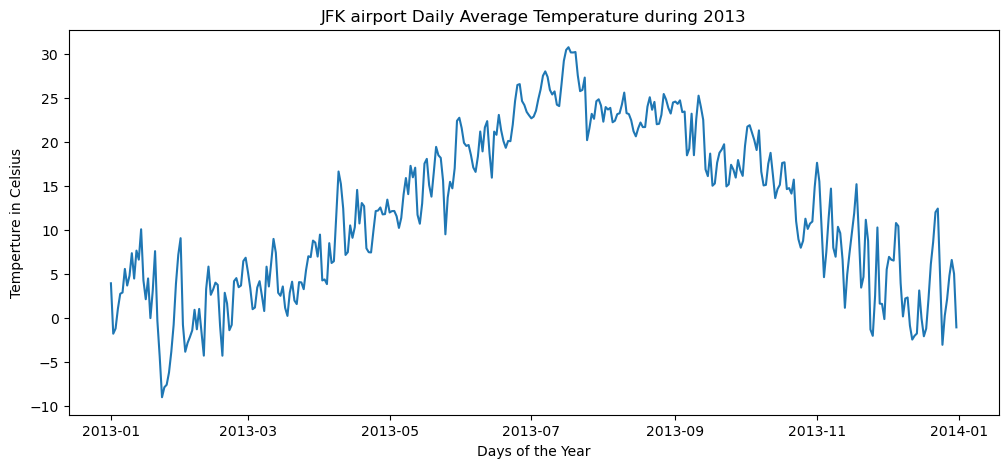

In [19]:
#plot (simple plot for 2d data)
plt.figure(figsize = (12, 5))
plt.plot(dailyJFKmean.time_hour, dailyJFKmean.temp)
plt.title("JFK airport Daily Average Temperature during 2013")
# x axis label
plt.xlabel("Days of the Year")
# y xais label
plt.ylabel("Temperture in Celsius")
# show plot
plt.show()

### _**Task:**_ Find the 5 hottest days.

### Identifying Extreme Temperature Days
Identifying the hottest days in the dataset allows us to understand temperature extremes and their occurrence.


In [20]:
sortedJFK = JFKdf.sort_values(by=['temp'], ascending = False) 
#sort JFK by temp from highest to lowest via 'ascend = False'
sortedJFK.head(5)
# print first 5 rows in the head which have been sorted to resemble the hottest

,index,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
4763,13471,JFK,2013,7,18,16,36.7,66.92,36.40,260.0,1.241402,1.428581,0.0,1016.7,16.09,2013-07-18 17:00:00
4762,13470,JFK,2013,7,18,15,36.1,68.00,39.05,330.0,0.902838,1.038968,0.0,1017.1,16.09,2013-07-18 16:00:00
4765,13473,JFK,2013,7,18,18,36.1,71.06,43.36,220.0,1.579967,1.818194,0.0,1015.7,16.09,2013-07-18 19:00:00
4764,13472,JFK,2013,7,18,17,35.6,71.06,44.57,250.0,1.128548,1.298710,0.0,1016.2,16.09,2013-07-18 18:00:00
4761,13469,JFK,2013,7,18,14,35.6,66.92,38.68,350.0,1.015693,1.168839,0.0,1017.2,16.09,2013-07-18 15:00:00


### Conclusion
Summarizing the key findings from the analysis, this section reflects on the insights gained from manipulating and visualizing heterogeneous data using Pandas.
